<a href="https://colab.research.google.com/github/sirishti746/Deep-Learning/blob/main/Multiclass_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classification with keras

In [61]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 - Data Ingestion

In [62]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"

In [63]:
df = pd.read_csv(url)

In [64]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


target feature: weather type

# Step 2 - Perform basic data quality checks

In [65]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [66]:
df.shape

(13200, 11)

In [67]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


# Step 3 - Separate X and Y

In [70]:
X = df.drop(columns=["Weather Type"])
y = df["Weather Type"]

In [71]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [72]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


# Step 4 : Apply preprocessing

In [73]:
X.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [74]:
cat_cols = list(X.columns[X.dtypes == "object"])

In [75]:
num_cols = list(X.columns[X.dtypes != "object"])

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [77]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [78]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first")
)


In [79]:
pre = ColumnTransformer(
    [
        ("num",num_pipe,num_cols),
        ("cat",cat_pipe,cat_cols)
    ]
).set_output(transform="pandas")

In [80]:
X_pre = pre.fit_transform(X)

In [81]:
X_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Step - 5 Train test split

In [82]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,y,test_size=0.2,random_state=42)

In [83]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [84]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [85]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [86]:
ytrain.head(

)

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [87]:
xtrain.shape

(10560, 15)

In [88]:
xtest.shape

(2640, 15)

### for neural networks you need to one hot encode the y data

In [89]:
ytrain_pre = pd.get_dummies(ytrain,dtype=int)
ytrain_pre.head()

,Cloudy,Rainy,Snowy,Sunny
3958,0,1,0,0
2239,0,1,0,0
3608,0,0,0,1
6848,0,1,0,0
6119,1,0,0,0


In [90]:
ytest_pre = pd.get_dummies(ytest,dtype=int)
ytest_pre.head()

,Cloudy,Rainy,Snowy,Sunny
4111,0,0,0,1
10607,0,0,0,1
7372,0,0,0,1
11786,0,0,1,0
12227,0,0,0,1


# Step 6 - Build a neural network

In [91]:
xtrain.shape[1]

15

In [92]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [93]:
model = Sequential(
    layers = [
        Input(shape=(xtrain.shape[1],)),
        Dense(32,activation="relu",kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(16,activation="relu",kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(ytrain_pre.shape[1],activation="softmax"),
    ]
)

In [94]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,108 (4.33 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(
    loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [96]:
es = EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [97]:
hist = model.fit(xtrain,ytrain_pre,validation_split=0.2,epochs=100,callbacks=[es])

Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4350 - loss: 1.2871 - val_accuracy: 0.8698 - val_loss: 0.5615
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8021 - loss: 0.6628 - val_accuracy: 0.8797 - val_loss: 0.4249
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8519 - loss: 0.5402 - val_accuracy: 0.8868 - val_loss: 0.3839
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.5019 - val_accuracy: 0.8916 - val_loss: 0.3523
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.4480 - val_accuracy: 0.8973 - val_loss: 0.3345
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8636 - loss: 0.4269 - val_accuracy: 0.8973 - val_loss: 0.3222
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8649 - loss: 0.4248 - val_accuracy: 0.9006 - val_loss: 0.3140
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8874 - loss: 0.3734 - val_accu

# Plot the learning curve

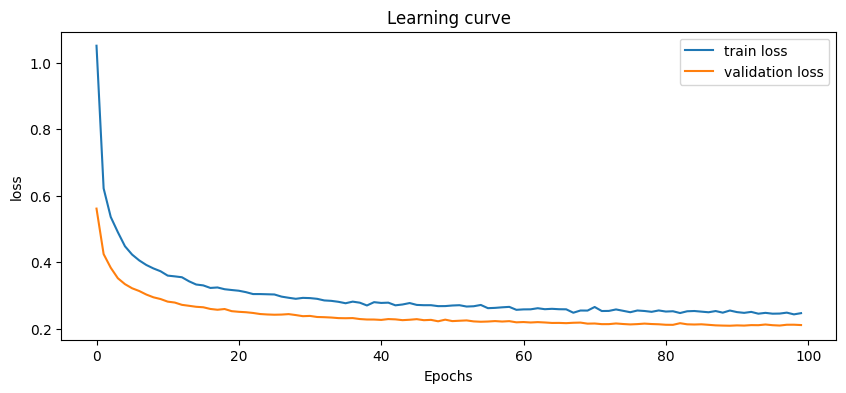

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(hist.history["loss"],label="train loss")
plt.plot(hist.history["val_loss"],label="validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Learning curve")
plt.show()

# Step 7 - Model evaluation

In [99]:
model.evaluate(xtrain,ytrain_pre)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9153 - loss: 0.2114


[0.20936895906925201, 0.9175189137458801]

In [100]:
model.evaluate(xtest,ytest_pre)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9097 - loss: 0.2452


[0.24307997524738312, 0.9041666388511658]

In [101]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.1137591e-02, 9.2848319e-01, 1.4179911e-03, 8.9611420e-03],
       [2.9074927e-03, 9.9674845e-01, 2.6557961e-04, 7.8571400e-05],
       [1.3250140e-04, 1.6371104e-06, 2.5380024e-05, 9.9984038e-01],
       [3.6270132e-03, 9.9513096e-01, 7.5303734e-04, 4.8899680e-04],
       [9.9935728e-01, 4.1819545e-05, 5.2445805e-05, 5.4846157e-04]],
      dtype=float32)

In [105]:
class_name = list(ytrain_pre.columns)

In [104]:
import numpy as np
train_idx = np.argmax(yprob_train,axis=1)
train_idx[0:5]

array([1, 1, 3, 1, 0])

In [106]:
ypred_train = [class_name[i] for i in train_idx]
ypred_train[0:5]

['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy']

In [108]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [107]:
yprobtest = model.predict(xtest)
yprobtest[0:5]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[7.9460340e-05, 8.2461781e-07, 1.9168669e-05, 9.9990058e-01],
       [5.6889566e-04, 7.7347489e-05, 7.9558682e-05, 9.9927419e-01],
       [3.3699712e-03, 3.8097598e-05, 6.0029497e-04, 9.9599159e-01],
       [1.5864019e-07, 1.1513001e-05, 9.9998713e-01, 1.2235316e-06],
       [1.2014736e-01, 1.8498596e-02, 2.6730970e-02, 8.3462310e-01]],
      dtype=float32)

In [109]:
test_idx = np.argmax(yprobtest,axis=1)
test_idx[0:5]

array([3, 3, 3, 2, 3])

In [110]:
ypred_test = [class_name[i] for i in test_idx]
ypred_test[0:5]

['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny']

In [111]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


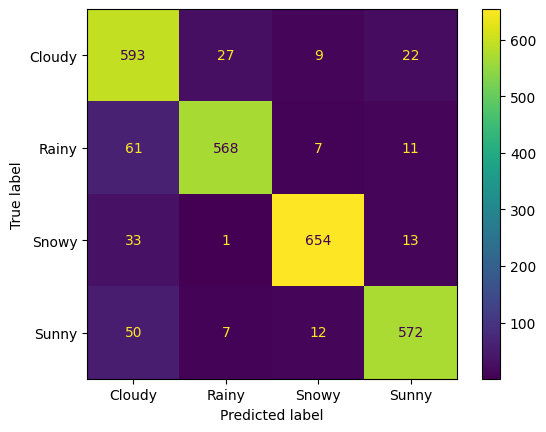

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

very few modules are misclassfied

In [113]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.80      0.91      0.85       651
       Rainy       0.94      0.88      0.91       647
       Snowy       0.96      0.93      0.95       701
       Sunny       0.93      0.89      0.91       641

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.91      0.90      0.91      2640



from above results it is clear that model can be used for out of sample prediction.

In [114]:
def predict_weather(model,class_names,xnew):
  yprob = model.predict(xnew)
  yidx = np.argmax(yprob,axis=1)
  ypred = [class_names[i] for i in yidx]
  return ypred

# Step 8 - Out of sample prediction

In [115]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv"

In [117]:
xnew = pd.read_csv(url2)

In [118]:
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [120]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [121]:
xnew_pre = pre.transform(xnew)

In [123]:
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [124]:
probs = model.predict(xnew_pre)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


In [127]:
probs[0:5]

array([[1.4783406e-06, 2.5343467e-04, 9.9974126e-01, 3.8551339e-06],
       [8.0952151e-03, 1.5907832e-03, 1.3609359e-03, 9.8895299e-01],
       [9.7990739e-01, 6.2687127e-03, 1.2156203e-03, 1.2608332e-02],
       [1.9511270e-03, 9.9658906e-01, 1.2251317e-03, 2.3459397e-04],
       [4.2349780e-03, 6.4197331e-05, 7.8399543e-04, 9.9491686e-01]],
      dtype=float32)

In [128]:
preds = predict_weather(model,class_name,xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [129]:
xnew["weather_type"] = preds
xnew[class_name] = probs.round(4)

In [131]:
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,weather_type,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0003,0.9997,0.0000
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0081,0.0016,0.0014,0.9890
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9799,0.0063,0.0012,0.0126
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0020,0.9966,0.0012,0.0002
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0042,0.0001,0.0008,0.9949


<Axes: xlabel='weather_type'>

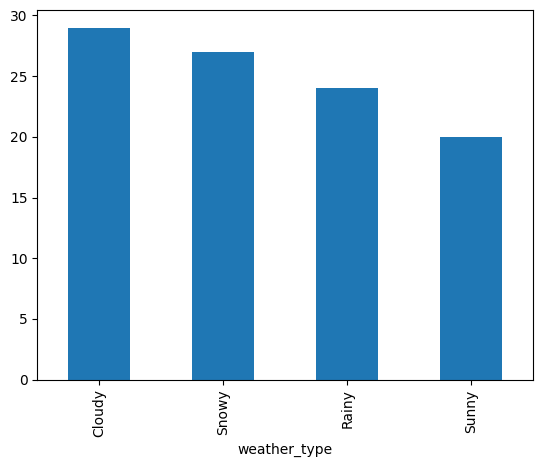

In [134]:
xnew["weather_type"].value_counts().plot(kind="bar")

In [135]:
xnew.to_csv("weather_prediction.csv",index=False)

# Step 9 - Save the model and preprocessor

In [136]:
import joblib as jl

In [137]:
jl.dump(pre,"preprocessor.joblib")

['preprocessor.joblib']

In [138]:
model.save("weathermodel.keras")

# Load this models

In [139]:
p = jl.load("preprocessor.joblib")

In [140]:
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [141]:
from tensorflow.keras.models import load_model
m = load_model("weathermodel.keras")

In [142]:
m

<Sequential name=sequential_1, built=True>

In [144]:
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326 (13.00 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,218 (8.67 KB)